# Week 43 handin

# Handin Exercise 9

Data from: https://snap.stanford.edu/data/roadNet-CA.txt.gz

1. Via Docker
  1. Download data from https://snap.stanford.edu/data/roadNet-CA.txt.gz use of tqdm to show the installation is optional.
  2. Unzip the file.

2. Print out the length of roadNet-CA.txt and find the Node ID '27'.
  1. Find the neighbours of 27 and print these out
  2. With this knowledge create a small Directed Graph of this data. For the neighbours that are not 'known', add these as cornors (without a connection further)
  3. Find the amount of Edges of roadNet-CA.txt and Nodes and print these out

3. Visualize this data using networkx and pygraphviz

4. Now try getting the first 200 Node IDs from roadNet-CA.txt and once again create a Directed Graph. And again Nodes that do not have a neighbour set these as cornors.



## 02 Status

How far you got:

All done

## 03 Exercises

1. Via Docker
    1. Download data from https://snap.stanford.edu/data/roadNet-CA.txt.gz use of tqdm to show the installation is optional.
    2. Unzip the file.

In [ ]:
#A
from modules import webget # webget.py must be created first and added to this folder.
from tqdm import tqdm
url = 'https://snap.stanford.edu/data/roadNet-CA.txt.gz' 
webget.download(url)

In [ ]:
#A
from tqdm import tqdm
import requests

url = 'https://snap.stanford.edu/data/roadNet-CA.txt.gz' 
# read 1024 bytes every time 
buffer_size = 1024
# download the body of response by chunk, not immediately
response = requests.get(url, stream=True)
# get the total file size
file_size = int(response.headers.get("Content-Length", 0))
# get the file name
filename = url.split("/")[-1]

# progress bar, changing the unit to bytes instead of iteration (default by tqdm)
progress = tqdm(response.iter_content(buffer_size), f"Downloading {filename}", total=file_size, unit="B", unit_scale=True, unit_divisor=1024)
with open(filename, "wb") as f:
    for data in progress:
        # write data read to the file
        f.write(data)
        # update the progress bar manually
        progress.update(len(data))
print('File downloaded')

In [ ]:
#B
import gzip
#!gunzip twitter_combined.txt.gz
with gzip.open('roadNet-CA.txt.gz','rb') as f_in:
    CA_data = f_in.read()
    with open('data/roadNet-CA.txt', 'wb') as f_out:
        f_out.write(CA_data)
print('File unzipped')

In [63]:
!ls data/roadNet-CA.txt

data/roadNet-CA.txt


2. Print out the length of roadNet-CA.txt and find the Node ID '27'.
    1. Find the neighbours of 27 and print these out
    2. With this knowledge create a small Directed Graph of this data. For the neighbours that are not 'known', add these as cornors (without a connection further)
    3. Find the amount of Edges of roadNet-CA.txt and Nodes and print these out

In [64]:
import networkx as nx
roadNet_CA = nx.read_edgelist('data/roadNet-CA.txt')

In [65]:
#A
print('27:', roadNet_CA['27'])
##Neighbours
print('25:', roadNet_CA['25'])
print('28:', roadNet_CA['28'])
print('29:', roadNet_CA['29'])

27: {'25': {}, '28': {}, '29': {}}
25: {'23': {}, '26': {}, '27': {}}
28: {'27': {}}
29: {'27': {}, '30': {}, '3255': {}}


In [66]:
#B
graph = {
  '27' : ['25', '28', '29'],
  '25' : ['23', '26', '27'],
  '28' : ['27'],
  '29' : ['27', '30', '3255'],
    ##Cornors
  '23' : [],
  '26' : [],
  '30' : [],
  '3255' : []
}

visited = []   # List to keep track of visited nodes.
queue = []     # Initialize a queue

def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)

    while queue: # while the list is not empty
        s = queue.pop(0) 
        print(str(visited.index(s)) + ': ' + s) # end = (default is \n)

        for neighbour in graph[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

bfs(visited, graph, '29')

# def density(graph):
#         """ method to calculate the density of a graph """
#         g = graph
#         V = len(g.keys())
#         E = len(self.edges())
#         return 2.0 * E / (V *(V - 1))
# print(density(graph))

0: 29
1: 27
2: 30
3: 3255
4: 25
5: 28
6: 23
7: 26


In [67]:
#C
print('Total Nodes:',roadNet_CA.number_of_nodes())
print('Total Edges:',roadNet_CA.number_of_edges())

#or 
print('\n')
print(nx.info(roadNet_CA))

Total Nodes: 1965206
Total Edges: 2766607


Name: 
Type: Graph
Number of nodes: 1965206
Number of edges: 2766607
Average degree:   2.8156


3. Visualize this data using networkx and pygraphviz

In [68]:
class Graph(object):

    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict


    def vertices(self):
        """ returns the vertices of a graph """
        return list(self.__graph_dict.keys())

    def edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()


    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        vertex1 = edge.pop()
        if edge:
            # not a loop
            vertex2 = edge.pop()
        else:
            # a loop
            vertex2 = vertex1
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].append(vertex2)
        else:
            self.__graph_dict[vertex1] = [vertex2]

    def __generate_edges(self):
        """ A private method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

    def find_isolated_vertices(self):
        """ returns a list of isolated vertices. """
        graph = self.__graph_dict
        isolated = []
        for vertex in graph:
            print(isolated, vertex)
            if not graph[vertex]:
                isolated += [vertex]
        return isolated
    
    def find_all_paths(self, start_vertex, end_vertex, path=[]):
        """ find all paths from start_vertex to 
            end_vertex in graph """
        graph = self.__graph_dict 
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return [path]
        if start_vertex not in graph:
            return []
        paths = []
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_paths = self.find_all_paths(vertex, 
                                                     end_vertex, 
                                                     path)
                for p in extended_paths: 
                    paths.append(p)
        return paths

    def density(self):
        """ method to calculate the density of a graph """
        g = self.__graph_dict
        V = len(g.keys())
        E = len(self.edges())
        return 2.0 * E / (V *(V - 1))


In [69]:
test = {
  '27' : ['25', '28', '29'],
  '25' : ['23', '26', '27'],
  '28' : ['27'],
  '29' : ['27', '30', '3255'],
    ##Cornors
  '23' : [],
  '26' : [],
  '30' : [],
  '3255' : []
}

graph = Graph(test)
print("Edges:")
edges = graph.edges()
print(edges)
print("Density:")
density = graph.density()
print(density)

print(type(test))

Edges:
[{'25', '27'}, {'28', '27'}, {'29', '27'}, {'25', '23'}, {'26', '25'}, {'30', '29'}, {'3255', '29'}]
Density:
0.25
<class 'dict'>


In [70]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout, write_dot

def create_graph(edges):
    graph = nx.DiGraph() 
    graph.clear()
    graph.add_edges_from(edges)

    return graph

#create_graph()

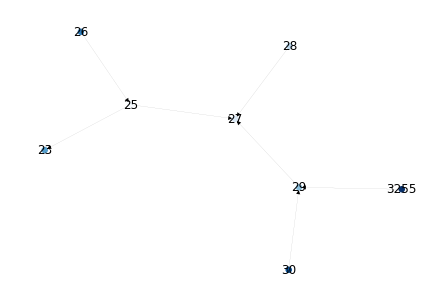

In [71]:
import pygraphviz
def draw_graph(graph):
    nx.draw(graph, pos=graphviz_layout(graph), 
            node_size=30, width=.05, cmap=plt.cm.Blues, 
            with_labels=True, node_color=range(len(graph)))
    
graph = create_graph(edges)
draw_graph(graph)

4. Now try getting the first 200 Node IDs from roadNet-CA.txt and once again create a Directed Graph. And again Nodes that do not have a neighbour set these as cornors.

In [1]:
a_file = open("data/roadNet-CA.txt", "r")
list_of_lists = []
for line in a_file:
  stripped_line = line.strip()
  line_list = stripped_line.split()
  list_of_lists.append(line_list)

a_file.close()
del list_of_lists[:4]
#print(list_of_lists[:20])

[['0', '1'], ['0', '2'], ['0', '469'], ['1', '0'], ['1', '6'], ['1', '385'], ['2', '0'], ['2', '3'], ['469', '0'], ['469', '380'], ['469', '37415'], ['6', '1'], ['6', '5'], ['385', '1'], ['385', '384'], ['385', '386'], ['3', '2'], ['3', '4'], ['3', '419'], ['3', '422']]


In [62]:
roadNet_CA_200 = {}
empty_cornors = {}
previous_number = -1

for num, x in enumerate(list_of_lists[:200]):
    if (previous_number != x[0]):
        roadNet_CA_200[x[0]] = [x[1]]
        if (int(x[1]) > 199):
            empty_cornors[x[1]] = []
    else:
        roadNet_CA_200[x[0]].append(x[1])
        if (int(x[1]) > 199):
            empty_cornors[x[1]] = []
    previous_number = x[0]
    
def Merge(dict1, dict2):
    res = {**dict1, **dict2}
    return res

combined_dicts = Merge(roadNet_CA_200,empty_cornors)
print(combined_dicts)

{'0': ['1', '2', '469'], '1': ['0', '6', '385'], '2': ['0', '3'], '469': [], '6': ['1', '5'], '385': [], '3': ['2', '4', '419', '422'], '4': ['3', '5', '98', '420'], '419': [], '422': [], '5': ['4', '6', '98'], '98': ['4', '5', '470', '35729'], '420': [], '7': ['8', '9', '79'], '8': ['7', '33'], '9': ['7', '10', '84'], '79': ['7', '78', '119'], '33': ['8', '32', '34'], '10': ['9', '11', '84', '110'], '84': ['9', '10', '83', '85'], '11': ['10', '12', '110'], '110': ['10', '11', '111', '112'], '12': ['11', '13', '95', '108'], '13': ['12', '14', '94', '95'], '108': ['12', '109', '113', '123'], '95': ['12', '13', '96'], '14': ['13', '15', '16', '77'], '94': ['13', '77', '93'], '15': ['14'], '16': ['14', '17'], '77': ['14', '17', '94'], '17': ['16', '18', '77', '3254'], '18': ['17', '19', '3254'], '3254': [], '19': ['18', '20', '23'], '20': ['19', '21', '22'], '23': ['19', '24', '25'], '21': ['20'], '22': ['20'], '24': ['23'], '25': ['23', '26', '27'], '26': ['25'], '27': ['25', '28', '29']

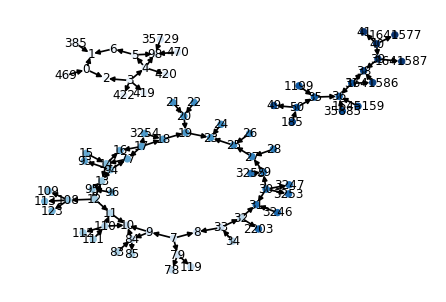

In [77]:
graph2 = Graph(combined_dicts)
edges2 = graph2.edges()

def draw_graph2(graph):
    nx.draw(graph, pos=graphviz_layout(graph), 
            node_size=40, width=1.70, cmap=plt.cm.Blues, 
            with_labels=True, node_color=range(len(graph)))

graph_pin2 = create_graph(edges2)
draw_graph2(graph_pin2)